<a href="https://colab.research.google.com/github/chrisaMel/Machine-Learning/blob/main/House_prediction_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df  = pd.read_csv('kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
#Visoualizong the data

<Figure size 1000x600 with 0 Axes>

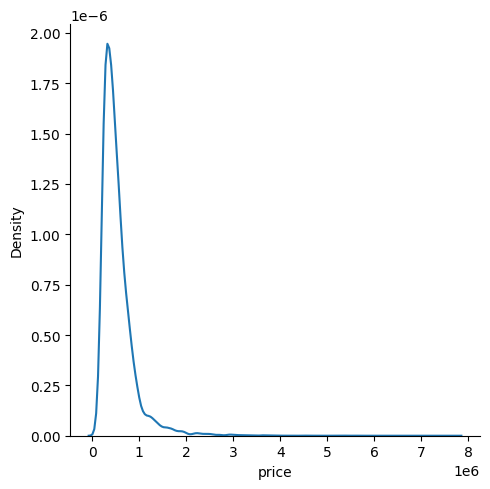

In [ ]:
plt.figure(figsize =(10,6))
sns.displot(df['price'],kind='kde')


KeyboardInterrupt: 

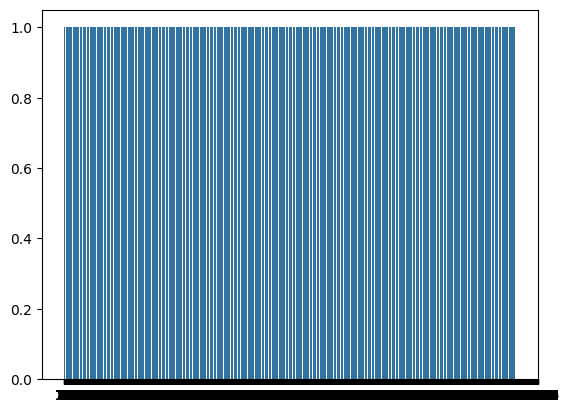

In [4]:
sns.countplot(df['bedrooms'])

In [5]:
df['date'] = pd.to_datetime(df['date'])

df.corr()['price'].sort_values()

,price
zipcode,-0.053402
id,-0.016772
date,-0.003998
long,0.022036
condition,0.036056
yr_built,0.053953
sqft_lot15,0.082845
sqft_lot,0.089876
yr_renovated,0.126424
floors,0.256804


<Axes: xlabel='price', ylabel='long'>

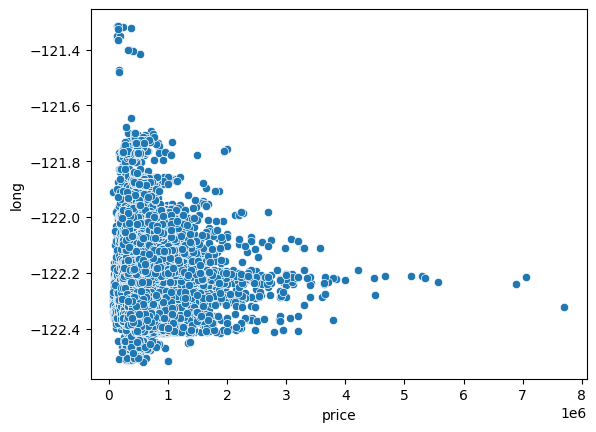

In [ ]:
sns.scatterplot(data = df,x = 'price',y = 'long')

<Axes: xlabel='long', ylabel='lat'>

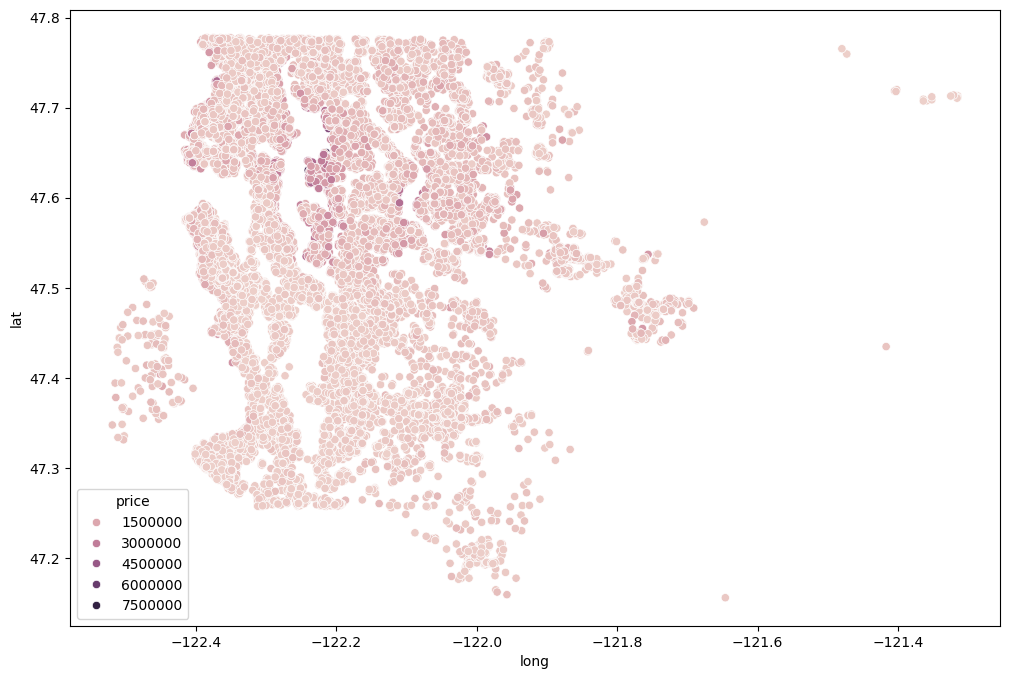

In [ ]:
plt.figure(figsize=(12,8))

sns.scatterplot(data = df,x = 'long',y = 'lat',hue='price')

In [6]:
non_top_1_per= df.sort_values(by='price',ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

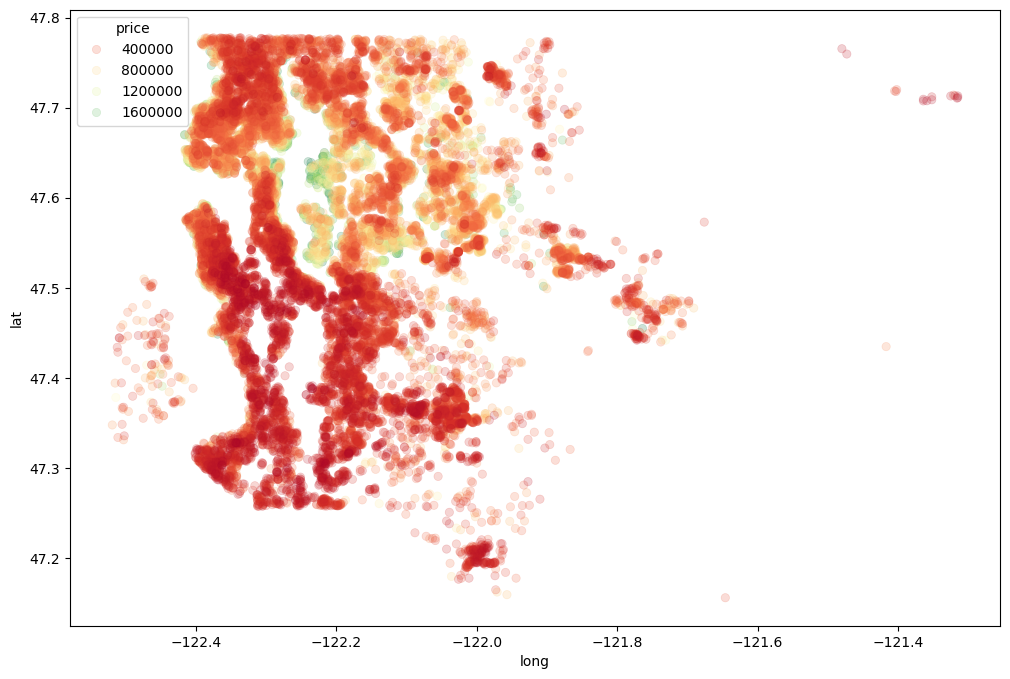

In [ ]:
plt.figure(figsize=(12,8))

sns.scatterplot(data = non_top_1_per,x = 'long',y = 'lat',hue='price',edgecolor =None,alpha = 0.2,palette='RdYlGn')

In [ ]:
#Shaping the data

In [7]:
df = df.drop('id', axis = 1)

In [8]:
df['date'] = pd.to_datetime(df['date'])


In [9]:
df ['year'] = df['date'].apply(lambda date: date.year)


In [10]:
df ['month'] = df['date'].apply(lambda date: date.month)


<Axes: xlabel='month', ylabel='price'>

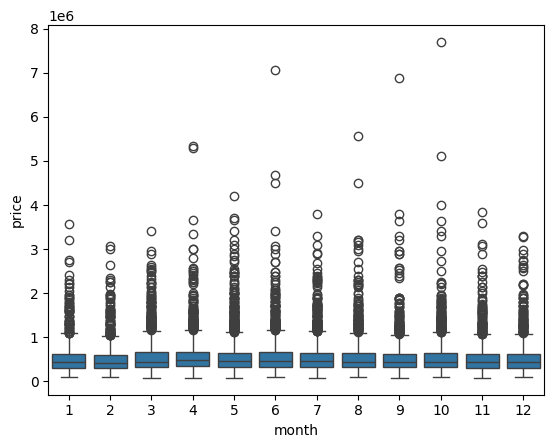

In [ ]:
sns.boxplot(data=df,x='month',y='price')

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64


<Axes: xlabel='month'>

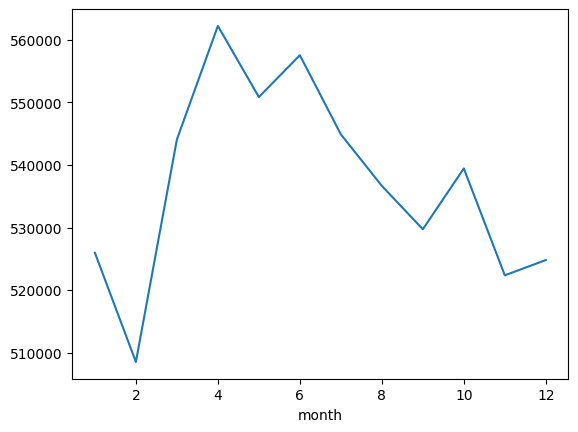

In [ ]:
print(df.groupby('month').mean()['price'])
df.groupby('month').mean()['price'].plot()

In [11]:
df['zipcode'].value_counts()

,count
zipcode,
98103,602
98038,589
98115,583
98052,574
98117,553
...,...
98102,104
98010,100
98024,80


In [12]:
df =df.drop('zipcode',axis=1)

In [13]:
df =df.drop('date',axis=1)

In [ ]:
#Prepare for fitting

In [14]:
X = df.drop('price',axis=1).values
y = df['price'].values
#because of keras

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow

In [21]:
from tensorflow import keras

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
X_train.shape

(15117, 19)

In [25]:
model = Sequential()

model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss= 'mse')

In [26]:
model.fit(x = X_train,y = y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs = 400)

Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 417002061824.0000 - val_loss: 418857680896.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 442211401728.0000 - val_loss: 412584181760.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 410743111680.0000 - val_loss: 359021969408.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 337928355840.0000 - val_loss: 204390006784.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 166915096576.0000 - val_loss: 99407978496.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 102969270272.0000 - val_loss: 94382923776.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 97647476736.0000 - val_loss: 92748800000.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 92046237696.0000 - val_loss: 91007459328.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 88336490496.0000 - val_loss: 89287827456.0000
Epoch 10/400
119/119 ━━━━━━

In [28]:
losses = pd.DataFrame(model.history.history)

<Axes: >

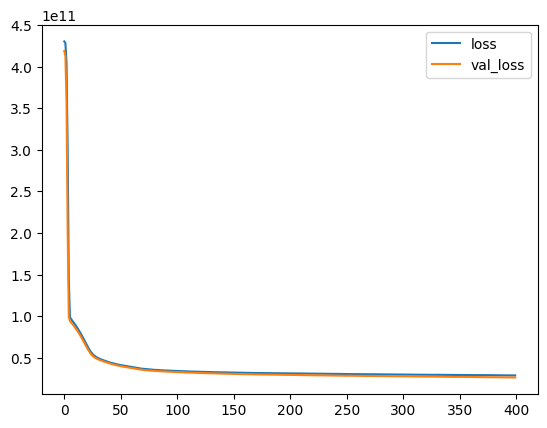

In [29]:
losses.plot()

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [31]:
predictions = model.predict(X_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [33]:
np.sqrt(mean_squared_error(y_test,predictions))

np.float64(162427.65520567424)

In [34]:
mean_absolute_error(y_test,predictions)

100207.74186077353

In [35]:
explained_variance_score(y_test,predictions)

0.8010601987388631

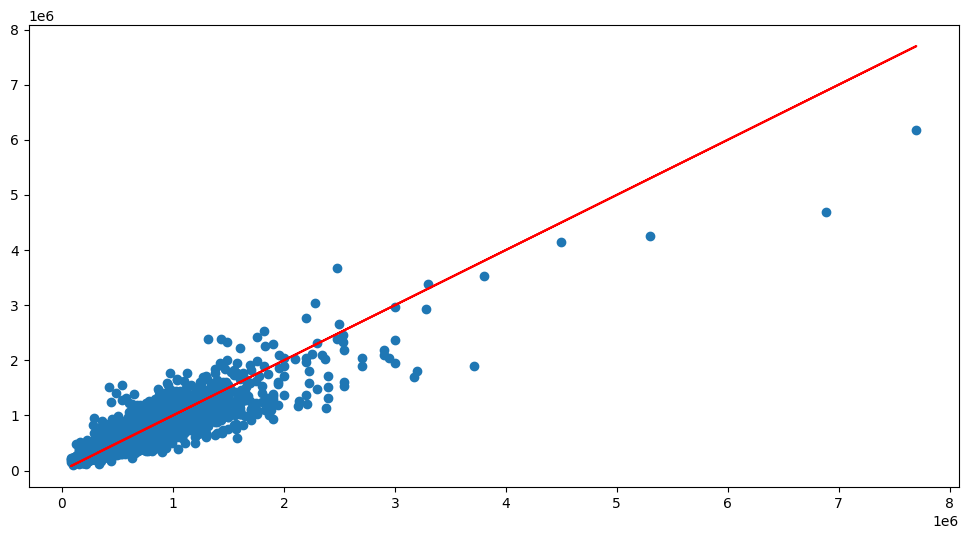

In [37]:
plt.figure(figsize =(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'red')

In [39]:
single_house= df.drop('price', axis =1).iloc[0]

In [42]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [43]:
model.predict(single_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[285885.7]], dtype=float32)